In [ ]:
%cd /home/rkube/frnn_work/run0_ges_code
%pwd
%matplotlib inline

/home/rkube/frnn_work/run0_ges_code


I'm trying to understand the function `find_elm_events_tar` that extracts among other time-to-elm from filterscope data. As a basis I'm trying to re-create the bottom line of this plot that Ge showed in her LDRD presentation

This is DIII-D 174829

![target_fs07.png](target_fs07.png)

In [2]:
shotnr = 174829

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

import shots
import loader
import data
import math
from signals import d3d

In [4]:
from conf_parser import parameters
conf = parameters("conf.yaml")

reading from multiple data folder!**********************************************
Selected signals (determines which signals are used for training):
[q95 safety factor, filterscope fs07, neped, peped, newid, teped, tewid, plasma current, Locked mode amplitude, Normalized Beta, stored energy, Plasma density, Radiated Power Core, Radiated Power Edge, Input Power (beam for d3d), Input Beam Torque, n1 finite frequency signals, q profile efitrt1, Electron temperature profile, Electron density profile, mpi66m322d_spectrogram]


In [5]:
import preprocess


In [222]:
import torch

In [6]:
conf["paths"]["all_signals"]

[Minimum safety factor,
 n1 finite frequency signals,
 n2 finite frequency signals_10ms,
 n3 finite frequency signals_10ms,
 q95 safety factor,
 internal inductance,
 plasma current,
 Normalized Beta,
 stored energy,
 Locked mode amplitude,
 Plasma density,
 Radiated Power Core,
 filterscope fs07,
 Radiated Power Edge,
 Radiated Power,
 Input Power (beam for d3d),
 Input Beam Torque,
 neped,
 teped,
 newid,
 peped,
 tewid,
 plasma current target,
 Electron temperature profile,
 Electron density profile,
 mpi66m322d_spectrogram,
 q profile efitrt1]

In [7]:
conf["paths"]["use_signals"]

[q95 safety factor,
 filterscope fs07,
 neped,
 peped,
 newid,
 teped,
 tewid,
 plasma current,
 Locked mode amplitude,
 Normalized Beta,
 stored energy,
 Plasma density,
 Radiated Power Core,
 Radiated Power Edge,
 Input Power (beam for d3d),
 Input Beam Torque,
 n1 finite frequency signals,
 q profile efitrt1,
 Electron temperature profile,
 Electron density profile,
 mpi66m322d_spectrogram]

In [8]:
conf["training"]["predict_time"]

1

In [9]:
df = np.load(join(conf["paths"]["processed_prepath"], "174829.npz"))
shot_174829 = shots.Shot(number=174829, machine=d3d, is_disruptive=False, signals=conf["paths"]["use_signals"], ttd=df["ttd"])

******************* Shot - signals= [q95 safety factor, filterscope fs07, neped, peped, newid, teped, tewid, plasma current, Locked mode amplitude, Normalized Beta, stored energy, Plasma density, Radiated Power Core, Radiated Power Edge, Input Power (beam for d3d), Input Beam Torque, n1 finite frequency signals, q profile efitrt1, Electron temperature profile, Electron density profile, mpi66m322d_spectrogram]
***************************signals_dict= None
Warning, disruption time (disruptivity) not set!  Either set t_disrupt or is_disruptive


In [10]:
shot_174829.preprocess(conf)

recomputing 174829/tigress/rkube/../../../tigress/FRNN/signal_data_ipsip//d3d/EFITRT1/RESULTS.AEQDSK.Q95/174829.txt
Signal q95 safety factor , shot 174829 was never downloaded
/tigress/rkube/../../../tigress/FRNN/signal_data_new_nov2019//d3d/EFITRT1/RESULTS.AEQDSK.Q95/174829.txt
/tigress/rkube/../../../tigress/FRNN/signal_data_ipsip//d3d//fs07/174829.txt
Signal filterscope fs07 , shot 174829 was never downloaded
/tigress/rkube/../../../tigress/FRNN/signal_data_new_nov2019//d3d//fs07/174829.txt
Signal filterscope fs07 , shot 174829 was never downloaded
/tigress/rkube/../../../tigress/FRNN/signal_data_new_2020//d3d//fs07/174829.txt
/tigress/rkube/../../../tigress/FRNN/signal_data_ipsip//d3d//prmtan_neped/174829.txt
Signal neped , shot 174829 was never downloaded
/tigress/rkube/../../../tigress/FRNN/signal_data_new_nov2019//d3d//prmtan_neped/174829.txt
Signal neped , shot 174829 was never downloaded
/tigress/rkube/../../../tigress/FRNN/signal_data_new_2020//d3d//prmtan_neped/174829.txt
/t

In [11]:
my_loader = loader.Loader(conf)

In [12]:
my_loader.training_batch_generator([174829])

<generator object Loader.training_batch_generator at 0x20012266dba0>

In [13]:
print(shot_174829)

number: 174829
machine: d3d
signals: [q95 safety factor, filterscope fs07, neped, peped, newid, teped, tewid, plasma current, Locked mode amplitude, Normalized Beta, stored energy, Plasma density, Radiated Power Core, Radiated Power Edge, Input Power (beam for d3d), Input Beam Torque, n1 finite frequency signals, q profile efitrt1, Electron temperature profile, Electron density profile, mpi66m322d_spectrogram]
signals_dict: {q95 safety factor: array([[5.00152],
       [5.00152],
       [5.00152],
       ...,
       [5.06022],
       [5.06022],
       [5.06022]], dtype=float32), filterscope fs07: array([[4.7410356e+15],
       [4.9019213e+15],
       [4.5890212e+15],
       ...,
       [2.4841825e+15],
       [2.1430121e+15],
       [2.3310589e+15]], dtype=float32), neped: array([[7.91991e+18],
       [7.91991e+18],
       [7.91991e+18],
       ...,
       [3.90554e+19],
       [3.90554e+19],
       [3.90554e+19]], dtype=float32), peped: array([[0.232537],
       [0.232537],
       [0.2

In [14]:
type(shot_174829.signals)

list

In [15]:
conf["paths"]["use_signals"]

[q95 safety factor,
 filterscope fs07,
 neped,
 peped,
 newid,
 teped,
 tewid,
 plasma current,
 Locked mode amplitude,
 Normalized Beta,
 stored energy,
 Plasma density,
 Radiated Power Core,
 Radiated Power Edge,
 Input Power (beam for d3d),
 Input Beam Torque,
 n1 finite frequency signals,
 q profile efitrt1,
 Electron temperature profile,
 Electron density profile,
 mpi66m322d_spectrogram]

In [16]:
predict_time = conf['training']['predict_time']
print(predict_time)

1


In [17]:
predict_mode = conf['training']['predict_mode']
print(predict_mode)

ttelm_target


In [18]:
target_description = conf['training']['target_description']
print(target_description)

['filterscope fs07']


In [19]:
res, sig_array = shot_174829.get_data_arrays_lmtarget(conf["paths"]["use_signals"], 
                                                      conf['data']['floatx'],
                                                      predict_time=1,
                                                      predict_mode=predict_mode,
                                                      target_description=target_description)

TargetDescription: ['filterscope fs07']
4061 2
174829
this is res after sig in self.signals 1 (4061,)
this is tar (4061,)


In [21]:
print(res.shape, sig_array.shape)

(4061, 1) (4061, 785)


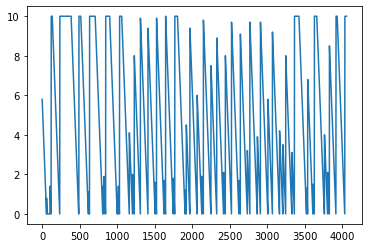

In [22]:
plt.plot(res)

In [23]:
sig_array.shape

(4061, 785)

In [24]:
for k, v in zip(shot_174829.signals_dict.keys(), shot_174829.signals_dict.values()):
    if k.description == "filterscope fs07":
        fs_signal = shot_174829.signals_dict[k]

In [214]:
fs_rs = (fs_signal - fs_signal.min()) / (fs_signal.max() - fs_signal.min())
tb_rs = np.arange(fs_rs.size) * 1e-3

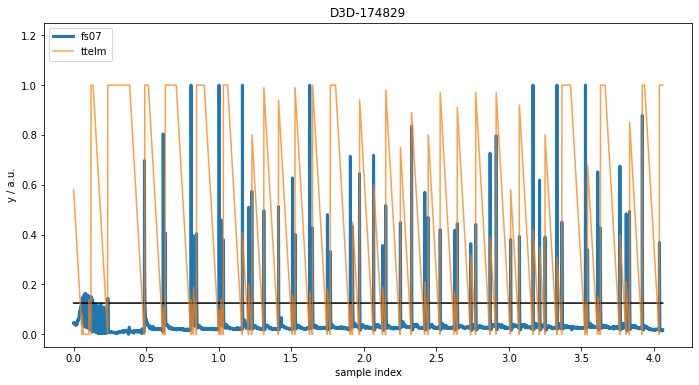

In [217]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0.2, 0.2, 0.75, 0.75])
ax.plot(tb_rs, fs_rs, lw=3, label="fs07")
ax.plot(tb_rs, fs_rs.mean() * 3 * np.ones(tb_rs.size), "k-")
ax.plot(tb_rs, res * 0.1, alpha=0.75, label="ttelm")
ax.set_title("D3D-174829")
ax.set_xlabel("sample index")
ax.set_ylabel("y / a.u.")
ax.set_ylim((-0.05, 1.25))
ax.legend(loc="upper left")
#ax.set_xlim((900, 1100))
#fig.savefig("d3d-174829_fs07+ttelm.pdf")

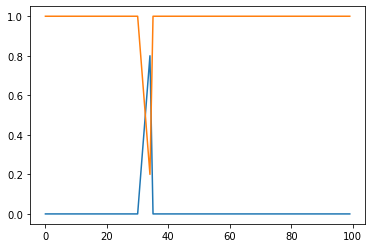

In [225]:
shot_174829.get_data_arrays(use_signals=shot_174829.get_signals())

(array([3., 3., 3., ..., 3., 3., 3.], dtype=float32),
 array([[5.0015202e+00, 4.7410356e+15, 7.9199098e+18, ..., 4.3350127e-01,
         3.5304499e-01, 5.7750601e-01],
        [5.0015202e+00, 4.9019213e+15, 7.9199098e+18, ..., 4.3350127e-01,
         3.5304499e-01, 5.7750601e-01],
        [5.0015202e+00, 4.5890212e+15, 7.9199098e+18, ..., 4.9885368e-01,
         3.2892957e-01, 1.7858300e-01],
        ...,
        [5.0602198e+00, 2.4841825e+15, 3.9055401e+19, ..., 4.8951006e-01,
         5.1009190e-01, 5.8511800e-01],
        [5.0602198e+00, 2.1430121e+15, 3.9055401e+19, ..., 3.3971170e-01,
         3.3796459e-01, 4.8254699e-01],
        [5.0602198e+00, 2.3310589e+15, 3.9055401e+19, ..., 3.2739937e-01,
         3.8008422e-01, 5.1740700e-01]], dtype=float32))

In [226]:
shot_174829.get_data_arrays_lmtarget(use_signals=conf["paths"]["use_signals"])

TargetDescription: Locked mode amplitude
4061 1
174829
this is res after sig in self.signals 1 (4061,)


(array([[1.9291 ],
        [1.93534],
        [1.88383],
        ...,
        [1.0268 ],
        [1.0481 ],
        [1.0481 ]], dtype=float32),
 array([[5.0015202e+00, 4.7410356e+15, 7.9199098e+18, ..., 4.3350127e-01,
         3.5304499e-01, 5.7750601e-01],
        [5.0015202e+00, 4.9019213e+15, 7.9199098e+18, ..., 4.3350127e-01,
         3.5304499e-01, 5.7750601e-01],
        [5.0015202e+00, 4.5890212e+15, 7.9199098e+18, ..., 4.9885368e-01,
         3.2892957e-01, 1.7858300e-01],
        ...,
        [5.0602198e+00, 2.4841825e+15, 3.9055401e+19, ..., 4.8951006e-01,
         5.1009190e-01, 5.8511800e-01],
        [5.0602198e+00, 2.1430121e+15, 3.9055401e+19, ..., 3.3971170e-01,
         3.3796459e-01, 4.8254699e-01],
        [5.0602198e+00, 2.3310589e+15, 3.9055401e+19, ..., 3.2739937e-01,
         3.8008422e-01, 5.1740700e-01]], dtype=float32))

In [227]:
pp = preprocess.Preprocessor(conf)

In [228]:
pp.preprocess_single_file(shot_174829)


174829 exists.

In [229]:
shot_174829.signals_dict

## Test custom ELM detection on synthetic data

In [251]:
tt = torch.tensor([4, 1, 2, 3])

torch.flip(torch.argsort(tt), [0])

print(tt.size(dim=0))

4


In [328]:
class target_TTELM():

    def __init__(self, max_ttelm=10.0, dt=1.0, threshold=lambda x: x.mean() * 1.5,
                 deadtime=5.0, peak_width=5):
        """
            Args:
                max_ttelm, float: Maximum time to ELM. in milliseconds.
                dt, float: Sample spacing, in milliseconds
                thresold, callable:
                deadtime, float: Separation of peaks, in milliseconds
                peak_width, int: Number of neighbouring elements a peak has to exceed
        
        """
        self.max_ttelm = max_ttelm
        self.dt = dt
        self.max_ttelm_ix = int(self.max_ttelm / self.dt)
        self.threshold = threshold
        self.deadtime = deadtime
        self.deadtime_ix = int(math.ceil(deadtime / dt))
        self.peak_width = int(peak_width)

    
    def __call__(self, tb, signal):
        """Returns time-to-ELM, calculated from signal.

        Args:
            tb: torch.tensor: Time-base for a signal that contains ELMs
            signal: torch.tensor: Signal that contains ELMs

        Output:
            ttelm: torch.tensor: Time-base that counts down to time of next ELM
        """
        assert(signal.size == signal.size)

        # Detect indices where ELM appear.
        elm_idx = self.peak_detection(signal)

        # Sort indices
        elm_idx, _ = elm_idx.sort()
        torch.flip(elm_idx, dims=[0])
        # Initialize ttelm arry with default value
        ttelm = self.max_ttelm * torch.ones_like(tb)
        
        # Look-back used to fill up ttelm
        lookback = torch.clip(torch.hstack([torch.tensor([5]), elm_idx[1:] - elm_idx[:-1]]), 
                              0, self.deadtime_ix)
        
        for lb, ix in zip(lookback, elm_idx):
            print(lb, ix, ttelm[ix + 1 - lb + 1:ix+1])
            # Insert linear count-down windows into ttelm target
            ttelm[ix - lb + 1:ix + 1] = ttelm[ix - lb + 1] + (0.0 - ttelm[ix-lb]) / lb * torch.arange(1, lb + 1)
            print("after: ", ttelm[ix + 1 - lb:ix+1])

        return ttelm

    def peak_detection(self, signal): # , deadtime=5, threshold=self.threshold, peak_width=5):
        """Detects ELMs in a time series.

        ELMs are defined as peaks in a time seris that exceed a threshold.
        The default threshold is 3 * mean(signal)


        Starting from the largest burst event in the time series at hand, we identify a set of
        disjunct sub records, placed symmetrically around the peak of burst events which exceed
        a given amplitude threshold until no more burst events exceeding this threshold are
        left uncovered.
        Used in Kube et al. PPCF 58, 054001 (2016).
        Input:
        ========
        signal.........ndarray,  float: Timeseries to scan for peaks
        dead_time......integer:  Separation of peaks in sampling points
        threshold......callable: Threshold a peak has to exceeed
        peak_width.....integer:  Number of neighbouring elements a peak has to exceed
        Output:
        ========
        peak_idx_list...ndarray, integer: Indices of peaks in signal
        """

        # Sort time series by magnitude and flip so that index to largest element comes first
        _, max_idx = torch.sort(signal)
        max_idx = torch.flip(max_idx, [0])

        # Remove peaks within dead_time to the array boundary
        max_idx = max_idx[max_idx > self.deadtime_ix]
        max_idx = max_idx[max_idx < signal.size(dim=0) - self.deadtime_ix]

        max_values = np.zeros_like(signal[max_idx])
        max_values[:] = np.squeeze(signal[max_idx])

        # Number of peaks exceeding threshold
        num_big_ones = torch.sum(signal > self.threshold(signal))
        try:
            max_values = max_values[:num_big_ones]
            max_idx = max_idx[:num_big_ones]
        except:
            raise BadDataException("detect_peaks_1d: No peaks in the unmasked part of the array.")

        # Mark the indices we need to skip here
        max_idx_copy = torch.zeros_like(max_idx)
        max_idx_copy[:] = max_idx

        # Eliminate values exceeding the threshold within dead_time of another
        # for idx, mv in enumerate(max_values):
        # print 'iterating over %d peaks' % ( np.size(max_idx))
        for i, idx in enumerate(max_idx):
            current_idx = max_idx_copy[i]
            if max_idx_copy[i] == -1:
                #    print 'idx %d is zeroed out' % (idx)
                continue

            # Check if this value is larger than the valueghbouring values of the
            # signal. If it is not, continue with next iteration of for loop
            if (
                signal[current_idx]
                < signal[current_idx - self.peak_width : current_idx + self.peak_width]
            ).any():
                max_idx_copy[i] = -1
                continue

            # Zero out all peaks closer than dead_time
            close_idx = torch.abs(max_idx_copy - idx)
            close_ones = torch.squeeze(torch.where(close_idx < self.deadtime_ix)[0])
            max_idx_copy[close_ones] = -1
            # Copy back current value
            max_idx_copy[i] = max_idx[i]

        # Remove all entries equal to -1
        max_idx_copy = max_idx_copy[max_idx_copy != -1]
        max_idx_copy = max_idx_copy[max_idx_copy < signal.size(dim=0)]

        # Return an ndarray with all peaks of large amplitude indices
        return max_idx_copy


In [329]:
# Create torch tensor data from all numpy arrays
fs_rs_t = torch.tensor(fs_rs[:,0])

tensor(35) tensor(5) tensor([0.2000, 0.4000, 0.6000, 0.8000, 1.0000])
tensor(50) tensor(5) tensor([0.2000, 0.4000, 0.6000, 0.8000, 1.0000])
tensor(68) tensor(5) tensor([0.3000, 0.6000, 0.9000, 1.2000, 1.5000])
tensor(74) tensor(5) tensor([0.2400, 0.4800, 0.7200, 0.9600, 1.2000])
tensor(78) tensor(4) tensor([0.4250, 0.8500, 1.2750, 1.7000])
unsorted: elm_idx = tensor([78, 68, 50, 35]) <class 'torch.Tensor'>
elm_idx = tensor([35, 50, 68, 78]) <class 'torch.Tensor'>
tensor([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 1

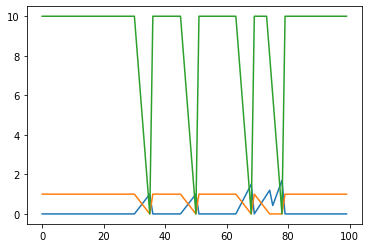

In [330]:
my_target_TTELM = target_TTELM()

num_ele = 100
dt = 1.0
lookback = 5
# Generate time base
tb = torch.arange(num_ele) * dt

# Generate synthetic signal
sig_test = torch.zeros(num_ele)
peak_idx = torch.tensor([35, 50, 68, 74, 78])       # Peak at 74 should be ignored
peak_amp = torch.tensor([1.0, 1.0, 1.5, 1.2, 1.7])

t0 = 1.0
ttp_arr = t0 * torch.ones(num_ele)

# Use lookback time samples to fill TTELM. IT's either 5 time samples
# or the time to previous ELM
lookback = torch.clip(torch.hstack([torch.tensor([5]), peak_idx[1:] - peak_idx[:-1]]), 0, 5)

for lb, ix, amp in zip(lookback, peak_idx, peak_amp):
    sig_test[ix - lb + 1:ix + 1] += (amp / lb) * torch.arange(1, lb + 1)
    ttp_arr[ix - lb + 1:ix + 1] = ttp_arr[ix - lb] + (0.0 - ttp_arr[ix-lb]) / lb * torch.arange(1, lb + 1)

    print(ix, lb, sig_test[ix + 1- lb:ix + 1])

ttelm = my_target_TTELM(tb, sig_test)
plt.plot(tb, sig_test)
plt.plot(tb, ttp_arr)
plt.plot(tb, ttelm)

In [324]:
peak_idx = torch.tensor([78, 74, 68, 50, 35])       # Peak at 74 should be ignored

print(peak_idx, type(peak_idx))

peak_idx, _ = peak_idx.sort()

print(peak_idx, type(peak_idx))

tensor([78, 74, 68, 50, 35]) <class 'torch.Tensor'>
tensor([35, 50, 68, 74, 78]) <class 'torch.Tensor'>


In [132]:
elm_idx.sort()

In [180]:
sig_test

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.2       , 0.4       , 0.6       , 0.8       , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.2       , 0.4       , 0.6       , 0.8       , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.3       , 0.6       ,
       0.9       , 1.2       , 1.5       , 0.        , 0.24      ,
       0.48      , 0.72      , 0.96      , 1.2       , 0.56666

In [140]:
#elm_idx = my_target_TTELM.peak_detection(fs_rs[:,0])
print(elm_idx)

[35, 50, 68, 74, 77]


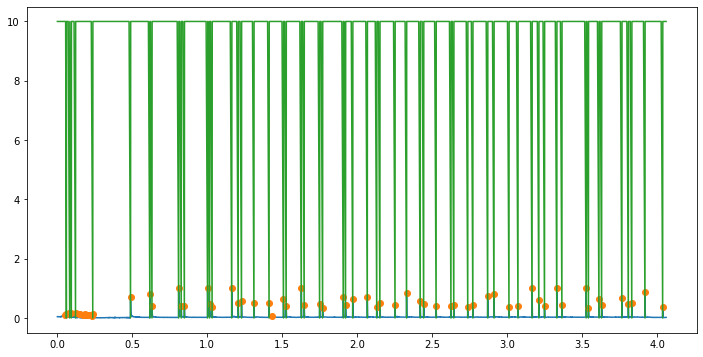

In [221]:
tb_fs = np.arange(fs_rs.size) * 1e-3

elm_ix = my_target_TTELM.peak_detection(fs_rs[:, 0])

my_target_TTELM2 = target_TTELM(threshold = lambda x: 3.0 * x.mean(), deadtime=10)
ttelm_fs = my_target_TTELM2(tb_fs, fs_rs[:, 0])


plt.figure(figsize=(12, 6))
#plt.figsize()
plt.plot(tb_fs, fs_rs)
plt.plot(tb_fs[elm_ix], fs_rs[elm_ix], 'o')
plt.plot(tb_fs, ttelm_fs)


In [124]:
fs_rs.shape, tb_fs.shape

((4061, 1), (4061,))